(427, 640, 3)


([], [])

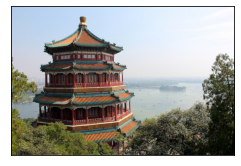

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
# 샘플 이미지 로딩
one_image = load_sample_image("china.jpg")
#이미지의 차원
print(one_image.shape)
# 전체 이미지
plt.figure(figsize=(4, 4))
plt.imshow(one_image, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
# 427x640x3장


(161048, 100, 150, 3)


([], [])

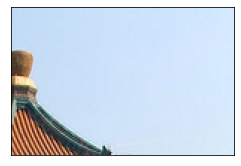

In [3]:
#부분 이미지 리스트
patches = image.extract_patches_2d(one_image, (100, 150))
print(patches.shape)
#부분 이미지
plt.figure(figsize=(4, 4))
plt.imshow(patches[200], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
# 전체 패치 수(이미지 조각)

In [10]:
import time
import numpy as np
from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d
faces = datasets.fetch_olivetti_faces()
# n_clusters 클러스터의 수
kmeans = MiniBatchKMeans(n_clusters=81, random_state=0, verbose=True)
# 부분 이미지의 사이즈
patch_size = (20, 20)
buffer = []
t0 = time.time()
# 400장의 이미지를 6회 반복: 2400
index = 0
for _ in range(6): # 전체 데이터를 6회 반복
    for img in faces.images: # 400장의 이미지
        data = extract_patches_2d(img, patch_size, max_patches=50,random_state=0)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            # 버퍼에 누적
            data = np.concatenate(buffer, axis=0)
            # 스케일링
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data) # 부분학습
            buffer = []
        if index % 100 == 0:
            print(' 부분학습: %4i / %i' % (index, 6 * len(faces.images)))
dt = time.time() - t0
print(' 실행시간:', dt)

c:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


[MiniBatchKMeans] Reassigning 6 cluster centers.
[MiniBatchKMeans] Reassigning 4 cluster centers.
 부분학습:  100 / 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
 부분학습:  200 / 2400
[MiniBatchKMeans] Reassigning 2 cluster centers.
[MiniBatchKMeans] Reassigning 1 cluster centers.
 부분학습:  300 / 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
 부분학습:  400 / 2400
 부분학습:  500 / 2400
 부분학습:  600 / 2400
 부분학습:  700 / 2400
 부분학습:  800 / 2400
 부분학습:  900 / 2400
 부분학습: 1000 / 2400
 부분학습: 1100 / 2400
 부분학습: 1200 / 2400
 부분학습: 1300 / 2400
 부분학습: 1400 / 2400
 부분학습: 1500 / 2400
 부분학습: 1600 / 2400
 부분학습: 1700 / 2400
 부분학습: 1800 / 2400
 부분학습: 1900 / 2400
 부분학습: 2000 / 2400
 부분학습: 2100 / 2400
 부분학습: 2200 / 2400
 부분학습: 2300 / 2400
 부분학습: 2400 / 2400
 실행시간: 7.471577167510986


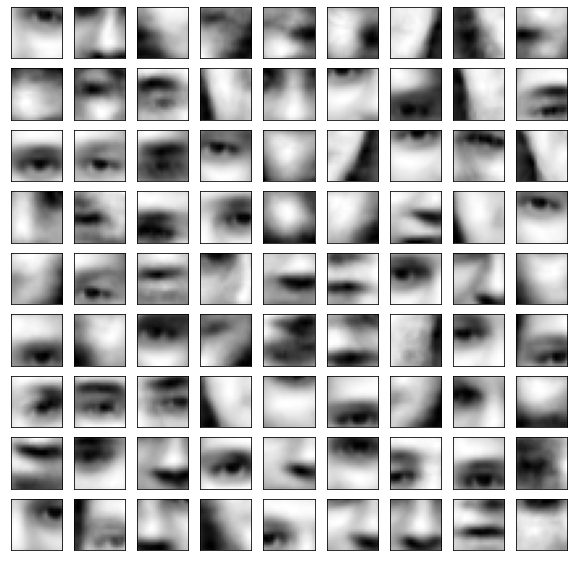

In [5]:
plt.figure(figsize=(10, 10))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show()
